## Готовим данные

In [53]:
import pandas as pd

In [54]:
df = pd.read_csv('02_titanic_train.csv')

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [57]:
df = df.drop(['Cabin', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1)

In [58]:
df = df[~df['Age'].isnull()]

In [59]:
df.shape

(714, 7)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [61]:
y = df['Survived']

## А где же машинное обучение?

In [62]:
from sklearn.linear_model import LogisticRegression  # импортируем модель машинного обучения
model = LogisticRegression()                         # инициализируем модель
model.fit(df, y)                                     # обучаем модель
predict = model.predict(df)                          # делаем предсказание

In [63]:
predict

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [64]:
# Но как сравнить? Как понять хорошо мы отработали или не очень?

In [65]:
list(zip(y, predict)) # сравним глазами

[(0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 

In [66]:
# Посчитаем сколько ответов отличается

In [67]:
sum(abs(y - predict))  # классная модель! все верно предсказывает!

0

In [68]:
# На самом деле у нас проблемы, Хьюстон!

# 1. а давайте посмотрим данные на которых обучаем

df.head().T

,0,1,2,3,4
PassengerId,1.00,2.0000,3.000,4.0,5.00
Survived,0.00,1.0000,1.000,1.0,0.00
Pclass,3.00,1.0000,3.000,1.0,3.00
Age,22.00,38.0000,26.000,35.0,35.00
SibSp,1.00,1.0000,0.000,1.0,0.00
Parch,0.00,0.0000,0.000,0.0,0.00
Fare,7.25,71.2833,7.925,53.1,8.05


In [69]:
# Есть колонка Survived (не опечатка, действительно колонка, я ж транспонировал выше)
# Это ж ответы
# 
# А какой код предсказания?
#
### model.predict(df)    
#
# Т.е. мы делаем предсказания передавая ответы?
# Это неверно =) Если есть ответы то делать предсказания и не надо.
# Нам же нужно смоделировать ситуацию когда ответы мы не знаем, для этого нужно их удалит
df = df.drop('Survived', axis=1)

In [70]:
# Повторяем код обучения и предсказывания
model = LogisticRegression()                     # инициализируем модель
model.fit(df, y)                                 # обучаем модель
predict = model.predict(df)                      # делаем предсказание

In [71]:
sum(abs(y - predict))  # классная модель! все верно предсказывает!

205

In [72]:
# Вот, уже похоже на правду, есть 205 отличий предсказаного от реального
# Но есть ли способ посчитать симпотичнее? И вообще как сравнивать разные черные ящики
# Метрики!!!

![Image](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/440px-Precisionrecall.svg.png)

In [73]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

In [74]:
precision_score(y, predict)

0.7073170731707317

In [75]:
recall_score(y, predict)

0.5

In [76]:
accuracy_score(y, predict)

0.7128851540616247

In [77]:
print(classification_report(y, predict))

             precision    recall  f1-score   support

          0       0.72      0.86      0.78       424
          1       0.71      0.50      0.59       290

avg / total       0.71      0.71      0.70       714



In [78]:
# Ок. но кажется мы еще кое что делаем неверно
# На чем мы обучаемся на том и делаем предсказания
# В реальной жизни мы будем же делать предсказания для тех, для кого не знаем реальные значения
# Смоделируем реальную жизнь

In [79]:
from sklearn.model_selection import train_test_split

![Image](http://scott.fortmann-roe.com/docs/docs/MeasuringError/holdout.png)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [32]:
# Повторяем код обучения и предсказывания, но обучаем на одном куске, а предсказываем на другом
model = LogisticRegression()                     # инициализируем модель
model.fit(X_train, y_train)                      # обучаем модель
predict = model.predict(X_test)                      # делаем предсказание

In [33]:
from sklearn.metrics import accuracy_score, f1_score

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.75
recall 0.42424242424242425
accuracy 0.6991525423728814
f1 0.5419354838709677


In [34]:
# Попробуем другой черный ящик, Сегодня не вникаем что внутри ящика, об этом узнаем позже

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
predict = model.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.7384615384615385
recall 0.48484848484848486
accuracy 0.711864406779661
f1 0.5853658536585367


In [35]:
# А еще можно менять не черные ящики, 
# а менять какие-то параметры у этих черных ящиков, тоже узнаем что за этим скрывается в следующих лекциях
# Пока это "ниточки" за которые "можно дергать" =)
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
predict = model.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.726027397260274
recall 0.5353535353535354
accuracy 0.7203389830508474
f1 0.616279069767442


In [36]:
# а еще модель умеет давать вероятность
predict_proba = model.predict_proba(X_test)

In [37]:
predict_proba[:,1]

array([0.475, 0.954, 0.474, 0.719, 0.042, 0.787, 0.253, 0.443, 0.284,
       0.084, 0.51 , 0.327, 0.827, 0.074, 0.863, 0.498, 0.298, 0.698,
       0.489, 0.587, 0.168, 0.343, 0.828, 0.868, 0.206, 0.577, 0.612,
       0.392, 0.634, 0.093, 0.143, 0.456, 0.724, 0.038, 0.118, 0.074,
       0.354, 0.273, 0.036, 0.221, 0.642, 0.085, 0.855, 0.269, 0.758,
       0.165, 0.412, 0.271, 0.317, 0.436, 0.647, 0.226, 0.791, 0.254,
       0.17 , 0.2  , 0.623, 0.365, 0.059, 0.275, 0.217, 0.154, 0.294,
       0.213, 0.14 , 0.592, 0.803, 0.751, 0.057, 0.231, 0.15 , 0.556,
       0.335, 0.117, 0.097, 0.129, 0.143, 0.131, 0.037, 0.844, 0.078,
       0.812, 0.179, 0.38 , 0.013, 0.053, 0.088, 0.141, 0.171, 0.266,
       0.192, 0.883, 0.523, 0.164, 0.413, 0.339, 0.697, 0.883, 0.742,
       0.241, 0.727, 0.377, 0.117, 0.394, 0.83 , 0.395, 0.084, 0.84 ,
       0.594, 0.194, 0.703, 0.119, 0.368, 0.253, 0.235, 0.49 , 0.397,
       0.632, 0.329, 0.016, 0.485, 0.15 , 0.227, 0.268, 0.819, 0.05 ,
       0.188, 0.401,

(-0.01, 1.01)

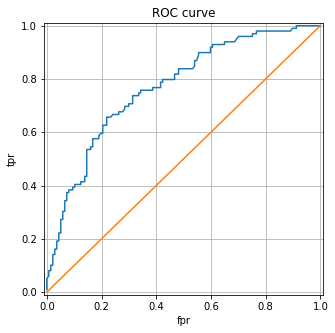

In [38]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [39]:
roc_auc_score(y_test, predict_proba[:,1])

0.7700361277003612

![Image](http://s5047.pcdn.co/wp-content/uploads/2015/06/07_cross_validation_diagram.png)

In [40]:
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier()
cross_val_score(
    rfc,
    df,
    y,
    scoring='roc_auc',
    cv=10
)

array([0.638332  , 0.5894146 , 0.58380112, 0.70288693, 0.6046798 ,
       0.72660099, 0.76559934, 0.80172414, 0.79269294, 0.727422  ])

In [41]:
# Окей мы теперь знаем, что можно влиять на
# 1) выбор черного ящика
# 2) параметры черного ящика

## Вернемся к данным

In [42]:
df = pd.read_csv('02_titanic_train.csv')

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [45]:
df = df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [46]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [47]:
# Закодируем пол и порт посадки с помощью OneHotEncoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [48]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [50]:
# Заполним пропуски в данных самым простым сподходящим пособом: медианой
df.loc[df['Age'].isnull(), 'Age'] = df['Age'].median()

In [51]:
# Проверяем что все численно
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [52]:
dtc = RandomForestClassifier(n_estimators=1000)
cross_val_score(
    dtc,
    df.drop('Survived', axis=1),
    df['Survived'],
    scoring='roc_auc',
    cv=10
)

array([0.79532468, 0.86181818, 0.78208556, 0.89491979, 0.92379679,
       0.87780749, 0.85828877, 0.82941176, 0.89759358, 0.89787582])